# 1. Load Data

In [1]:
import numpy as np
import torch
import random

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DATA_PATH = "../Gomoku/gomoku_dataset_split/"

# 棋盘状态 (N, 15, 15)
train_board_states = np.load(DATA_PATH + '/train/full_board/board_states.npy')
print('board_states shape:', train_board_states.shape)

# 下一个落子坐标 (N, 2)
train_next_moves_coords = np.load(DATA_PATH + '/train/full_board/next_moves_coords.npy')
print('next_moves_coords shape:', train_next_moves_coords.shape)

# 下一个落子玩家 (N,)
train_next_moves_players = np.load(DATA_PATH + '/train/full_board/next_moves_players.npy')
print('next_moves_players shape:', train_next_moves_players.shape)

# 棋盘状态 (N, 15, 15)
test_board_states = np.load(DATA_PATH + '/test/full_board/board_states.npy')
print('board_states shape:', test_board_states.shape)

# 下一个落子坐标 (N, 2)
test_next_moves_coords = np.load(DATA_PATH + '/test/full_board/next_moves_coords.npy')
print('next_moves_coords shape:', test_next_moves_coords.shape)

# 下一个落子玩家 (N,)
test_next_moves_players = np.load(DATA_PATH + '/test/full_board/next_moves_players.npy')
print('next_moves_players shape:', test_next_moves_players.shape)

board_states shape: (20921, 15, 15)
next_moves_coords shape: (20921, 2)
next_moves_players shape: (20921,)
board_states shape: (5457, 15, 15)
next_moves_coords shape: (5457, 2)
next_moves_players shape: (5457,)


In [2]:
# 示例：展示第i步
for i in range(12394, 12399):
    print('='*30)
    print(f'第{i}步棋盘:')
    print(train_board_states[i])
    print(f'第{i+1}步落子坐标:', train_next_moves_coords[i])
    print(f'第{i+1}步落子玩家:', train_next_moves_players[i])
    print(f'第{i+1}步落子玩家: col={train_next_moves_coords[i][0]}, row={train_next_moves_coords[i][1]}')
    print('='*30)

第12394步棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0  0  0 -1  1  0 -1  1 -1 -1  0  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  1]
 [-1 -1 -1  1 -1  1 -1  1  1  1 -1  1  0  1  0]
 [-1  1  1  1  1 -1  1 -1 -1  1 -1  1  0  1 -1]
 [ 1  1 -1 -1 -1  1 -1  1  0  1 -1 -1 -1 -1  1]
 [ 0  1 -1  1 -1  1  1  1 -1  1  1  0 -1 -1  0]
 [-1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 0  1  1 -1  1  1  1 -1  0  1  1  0 -1  1  1]
 [ 1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1]
 [ 0 -1  0 -1  1  1  0 -1 -1  1  1 -1  1  0 -1]
 [ 1  0 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  0  0]
 [-1 -1  1 -1 -1  1  0  0  1 -1 -1  1  0  1  1]
 [ 1 -1  0  0 -1  0  1  0  0 -1 -1  1 -1  0  0]]
第12395步落子坐标: [ 2 14]
第12395步落子玩家: 1
第12395步落子玩家: col=2, row=14
第12395步棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0  0  0 -1  1  0 -1  1 -1 -1  0  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  1]
 [

# 2. Process Data

In [3]:
import pandas as pd

# 合并为DataFrame，每行一个样本，包含棋盘和玩家
train_df = pd.DataFrame({
    'board_state': list(train_board_states),
    'next_moves_player': train_next_moves_players
})
train_df

,board_state,next_moves_player
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
...,...,...
20916,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
20917,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1
20918,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",-1
20919,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...",1


In [4]:
# next_moves_coords处理y成one-hot编码
# 假设棋盘为15x15，坐标为(x, y)，将其转为one-hot向量，长度225

def coords_to_onehot(coords, board_size=15):
    # coords: (N, 2)
    N = coords.shape[0]
    onehot = np.zeros((N, board_size * board_size), dtype=np.int32)
    for i, (col, row) in enumerate(coords):
        idx = row * board_size + col
        onehot[i, idx] = 1
    return onehot

# 处理后的y
train_y_onehot = coords_to_onehot(train_next_moves_coords)
print('y_onehot shape:', train_y_onehot.shape)
print('原第一个样本的数据:', train_next_moves_coords[0])
print('转换后第一个样本的one-hot:', train_y_onehot[0])
print('转换后第一个样本的index:', np.argmax(train_y_onehot[0]))

y_onehot shape: (20921, 225)
原第一个样本的数据: [7 8]
转换后第一个样本的one-hot: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
转换后第一个样本的index: 127


In [5]:
# 同样处理测试集
test_df = pd.DataFrame({
    'board_state': list(test_board_states),
    'next_moves_player': test_next_moves_players
})
test_y_onehot = coords_to_onehot(test_next_moves_coords)
print('测试集y_onehot shape:', test_y_onehot.shape)

测试集y_onehot shape: (5457, 225)


In [6]:
# 数据预处理：将棋盘状态展开为一维向量
def preprocess_X(df):
    board_flat = np.array([x.flatten() for x in df['board_state']])  # (N, 225)
    player = df['next_moves_player'].values.reshape(-1, 1)  # (N, 1)
    X = np.concatenate([player, board_flat], axis=1)  # (N, 226)
    return X


# 使用预处理结果
train_X_np = preprocess_X(train_df)
train_y_np = train_y_onehot

test_X_np = preprocess_X(test_df)
test_y_np = test_y_onehot

In [7]:
print('训练集X shape:', train_X_np.shape)
print('训练集y shape:', train_y_np.shape)
print('测试集X shape:', test_X_np.shape)
print('测试集y shape:', test_y_np.shape)

训练集X shape: (20921, 226)
训练集y shape: (20921, 225)
测试集X shape: (5457, 226)
测试集y shape: (5457, 225)


In [8]:
import torch

def check_legal_moves(X_np, y_onehot):
    # X: (N, 226) = [player, board_flat(225)]
    # y_onehot: (N,225)
    X = torch.tensor(X_np, dtype=torch.float32)
    y_idx = torch.tensor(y_onehot).argmax(dim=1)

    board_flat = X[:, 1:]
    mask = (board_flat == 0)  # True=空位

    # 检查目标是否在合法位置，比例越接近1，说明下到非法位置的走法越多，会导致训练期mask爆炸
    legal_target = mask.gather(1, y_idx.unsqueeze(1)).squeeze(1)
    illegal_ratio = (~legal_target).float().mean().item()
    print('目标落在非空位的样本占比:', illegal_ratio)
    return legal_target

train_legal_target = check_legal_moves(train_X_np, train_y_onehot)
test_legal_target = check_legal_moves(test_X_np, test_y_np)

目标落在非空位的样本占比: 0.00028679316164925694
目标落在非空位的样本占比: 0.0005497526144608855


In [9]:
# 打印所有非法样本的下标和棋盘
train_illegal_indices = (~train_legal_target).nonzero(as_tuple=True)[0].tolist()
test_illegal_indices = (~test_legal_target).nonzero(as_tuple=True)[0].tolist()
print('训练集训练集非法样本下标:', train_illegal_indices)
print('测试集非法样本下标:', test_illegal_indices)
for idx in train_illegal_indices:
    print(f'训练集样本 {idx} 的棋盘:')
    print(train_board_states[idx])
    print(f'目标落子坐标:', train_next_moves_coords[idx])
    print('-'*40)
for idx in test_illegal_indices:
    print(f'测试集样本 {idx} 的棋盘:')
    print(test_board_states[idx])
    print(f'目标落子坐标:', test_next_moves_coords[idx])
    print('-'*40)

训练集训练集非法样本下标: [12395, 12397, 12399, 19536, 19538, 19540]
测试集非法样本下标: [3452, 3454, 3456]
训练集样本 12395 的棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0  0  0 -1  1  0 -1  1 -1 -1  0  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  1]
 [-1 -1 -1  1 -1  1 -1  1  1  1 -1  1  0  1  0]
 [-1  1  1  1  1 -1  1 -1 -1  1 -1  1  0  1 -1]
 [ 1  1 -1 -1 -1  1 -1  1  0  1 -1 -1 -1 -1  1]
 [ 0  1 -1  1 -1  1  1  1 -1  1  1  0 -1 -1  0]
 [-1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 0  1  1 -1  1  1  1 -1  0  1  1  0 -1  1  1]
 [ 1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1]
 [ 0 -1  0 -1  1  1  0 -1 -1  1  1 -1  1  0 -1]
 [ 1  0 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  0  0]
 [-1 -1  1 -1 -1  1  0  0  1 -1 -1  1  0  1  1]
 [ 1 -1  1  0 -1  0  1  0  0 -1 -1  1 -1  0  0]]
目标落子坐标: [ 2 14]
----------------------------------------
训练集样本 12397 的棋盘:
[[ 0  0  1  0 -1  1  1 -1  1 -1  1  0  0 -1  0]
 [ 1 -1  1  0  1  0 -1 -1  1 -1  1  1  1  1 -1]
 [ 0 

In [10]:
# 移除非法样本
train_valid_mask = train_legal_target.numpy()  # True=合法，False=非法
train_X_np = train_X_np[train_valid_mask]
train_y_onehot = train_y_onehot[train_valid_mask]
print('移除后训练集X shape:', train_X_np.shape)
print('移除后训练集y shape:', train_y_onehot.shape)
test_valid_mask = test_legal_target.numpy()  # True=合法，False=非法
test_X_np = test_X_np[test_valid_mask]
test_y_onehot = test_y_onehot[test_valid_mask]
print('移除后测试集X shape:', test_X_np.shape)
print('移除后测试集y shape:', test_y_onehot.shape)

# 再次进行检查
check_legal_moves(train_X_np, train_y_onehot)
check_legal_moves(test_X_np, test_y_onehot)

# 检查数据量
train_y_np = train_y_onehot
test_y_np = test_y_onehot
print('最终训练集样本数:', train_X_np.shape[0])
print('最终训练集标签数:', train_y_np.shape[0])
print('最终测试集样本数:', test_X_np.shape[0])
print('最终测试集标签数:', test_y_np.shape[0])

移除后训练集X shape: (20915, 226)
移除后训练集y shape: (20915, 225)
移除后测试集X shape: (5454, 226)
移除后测试集y shape: (5454, 225)
目标落在非空位的样本占比: 0.0
目标落在非空位的样本占比: 0.0
最终训练集样本数: 20915
最终训练集标签数: 20915
最终测试集样本数: 5454
最终测试集标签数: 5454


# 3. Define Neural Network

In [11]:
# 用PyTorch定义一个简单的神经网络模型
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, input_dim=226, output_dim=225):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, output_dim)
    def forward(self, x):
        # x: (batch, 226), board_flat: (batch, 225)
        board_flat = x[:, 1:]  # (batch, 225)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        logits = self.fc3(x)  # (batch, 225)
        # mask非法落子
        mask = (board_flat == 0)
        logits = logits.masked_fill(~mask, -1e9)
        return logits

# 实例化模型
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=226, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=225, bias=True)
)


# 4. Validation Before Training

In [12]:
# 转换数据为torch.Tensor
train_X_tensor = torch.tensor(train_X_np, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y_np, dtype=torch.float32)
train_output = model(train_X_tensor)

# 转换数据为torch.Tensor
test_X_tensor = torch.tensor(test_X_np, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y_np, dtype=torch.float32)
test_output = model(test_X_tensor)

In [13]:
# 计算损失和准确率所用的目标应为类别索引（0..224）而非one-hot
# 将 one-hot 转为索引，避免在 CrossEntropyLoss 中传入浮点 one-hot
train_target_idx = train_y_tensor.argmax(dim=1).long()
test_target_idx = test_y_tensor.argmax(dim=1).long()

loss_fn = nn.CrossEntropyLoss()
train_loss = loss_fn(train_output, train_target_idx)
test_loss = loss_fn(test_output, test_target_idx)
print(f"训练前训练集损失: {train_loss.item():.4f}")
print(f"训练前测试集损失: {test_loss.item():.4f}")

# 计算准确率（与前一致）
train_pred_idx = train_output.argmax(dim=1)
train_true_idx = train_target_idx
train_acc = (train_pred_idx == train_true_idx).float().mean().item()
print(f"训练前训练集准确率: {train_acc*100:.2f}%")

test_pred_idx = test_output.argmax(dim=1)
test_true_idx = test_target_idx
test_acc = (test_pred_idx == test_true_idx).float().mean().item()
print(f"训练前测试集准确率: {test_acc*100:.2f}%")

训练前训练集损失: 5.3183
训练前测试集损失: 5.3128
训练前训练集准确率: 0.10%
训练前测试集准确率: 0.22%


# 5. Training

Epoch 1/100, Train Loss: 4.1557, Val Loss: 3.7864, Train Acc: 7.03%, Val Acc: 9.94%
Epoch 2/100, Train Loss: 3.5407, Val Loss: 3.4443, Train Acc: 13.58%, Val Acc: 14.24%
Epoch 3/100, Train Loss: 3.2008, Val Loss: 3.2314, Train Acc: 19.19%, Val Acc: 17.97%
Epoch 4/100, Train Loss: 2.9360, Val Loss: 3.1073, Train Acc: 23.62%, Val Acc: 21.41%
Epoch 5/100, Train Loss: 2.7137, Val Loss: 2.9809, Train Acc: 28.82%, Val Acc: 25.38%
Epoch 6/100, Train Loss: 2.5151, Val Loss: 2.8958, Train Acc: 33.02%, Val Acc: 28.11%
Epoch 7/100, Train Loss: 2.3399, Val Loss: 2.8502, Train Acc: 36.73%, Val Acc: 29.88%
Epoch 8/100, Train Loss: 2.1748, Val Loss: 2.7795, Train Acc: 40.85%, Val Acc: 34.23%
Epoch 9/100, Train Loss: 2.0269, Val Loss: 2.7434, Train Acc: 44.51%, Val Acc: 34.85%
Epoch 10/100, Train Loss: 1.8957, Val Loss: 2.7293, Train Acc: 47.85%, Val Acc: 36.42%
Epoch 11/100, Train Loss: 1.7710, Val Loss: 2.7142, Train Acc: 51.09%, Val Acc: 39.15%
Epoch 12/100, Train Loss: 1.6657, Val Loss: 2.6996, Tr

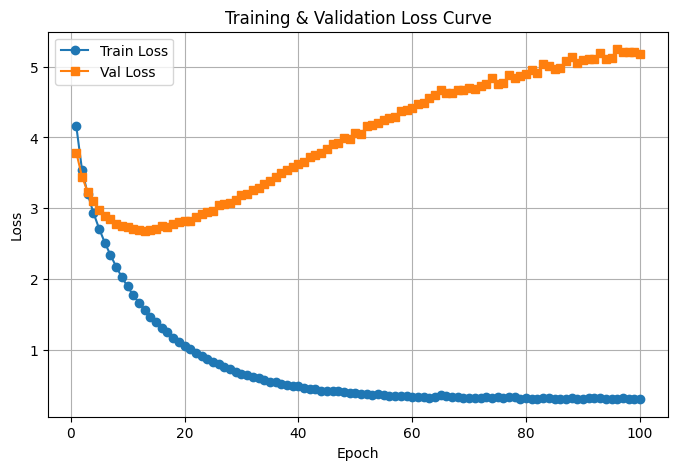

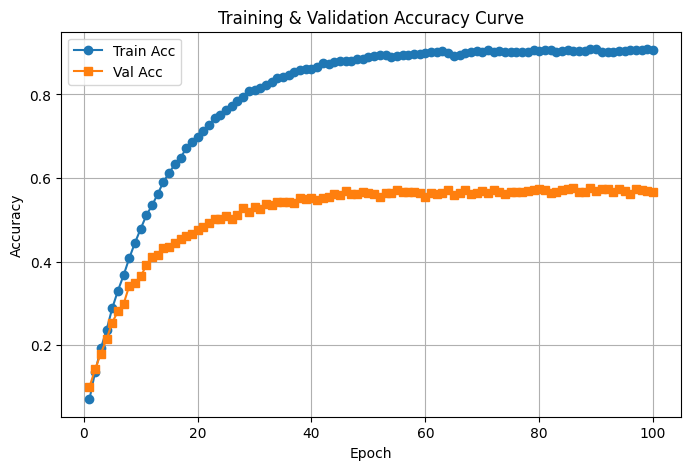

In [14]:
# 训练时拆分验证集，并同时画训练和验证损失曲线、准确率曲线
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 注意：CrossEntropyLoss 需要整型类别索引作为目标
# 因此将 y 的 one-hot 转换为类别索引后再拆分
all_X = train_X_tensor
all_y_idx = train_y_tensor.argmax(dim=1).long()

X_train, X_val, y_train_idx, y_val_idx = train_test_split(all_X, all_y_idx, test_size=0.1, random_state=42)

num_epochs = 100
batch_size = 64
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

train_dataset = torch.utils.data.TensorDataset(X_train, y_train_idx)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val_idx)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    # 训练
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch_X, batch_y_idx in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y_idx)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * batch_X.size(0)
        # 计算准确率
        pred_idx = output.argmax(dim=1)
        correct_train += (pred_idx == batch_y_idx).sum().item()
        total_train += batch_X.size(0)
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(correct_train / total_train)

    # 验证
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for batch_X, batch_y_idx in val_loader:
            output = model(batch_X)
            loss = loss_fn(output, batch_y_idx)
            total_val_loss += loss.item() * batch_X.size(0)
            pred_idx = output.argmax(dim=1)
            correct_val += (pred_idx == batch_y_idx).sum().item()
            total_val += batch_X.size(0)
    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train Acc: {train_acc_list[-1]*100:.2f}%, Val Acc: {val_acc_list[-1]*100:.2f}%")

# 绘制训练和验证损失曲线
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_loss_list, marker='o', label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss_list, marker='s', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证准确率曲线
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_acc_list, marker='o', label='Train Acc')
plt.plot(range(1, num_epochs+1), val_acc_list, marker='s', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# 6. Validation After Traning

In [15]:
# 训练后再计算一次训练集和测试集损失
model.eval()
with torch.no_grad():
    train_output = model(train_X_tensor)
    test_output = model(test_X_tensor)

# 与 CrossEntropyLoss 配套使用类别索引
after_train_train_target_idx = train_y_tensor.argmax(dim=1).long()
after_train_test_target_idx = test_y_tensor.argmax(dim=1).long()

train_loss = loss_fn(train_output, after_train_train_target_idx)
test_loss = loss_fn(test_output, after_train_test_target_idx)
print(f"训练后训练集损失: {train_loss.item():.4f}")
print(f"训练后测试集损失: {test_loss.item():.4f}")

# 计算准确率
train_pred_idx = train_output.argmax(dim=1)
train_true_idx = after_train_train_target_idx
train_acc = (train_pred_idx == train_true_idx).float().mean().item()
print(f"训练后训练集准确率: {train_acc*100:.2f}%")

test_pred_idx = test_output.argmax(dim=1)
test_true_idx = after_train_test_target_idx
test_acc = (test_pred_idx == test_true_idx).float().mean().item()
print(f"训练后测试集准确率: {test_acc*100:.2f}%")

训练后训练集损失: 0.7634
训练后测试集损失: 13.5755
训练后训练集准确率: 88.04%
训练后测试集准确率: 48.97%


# 7. Visualization

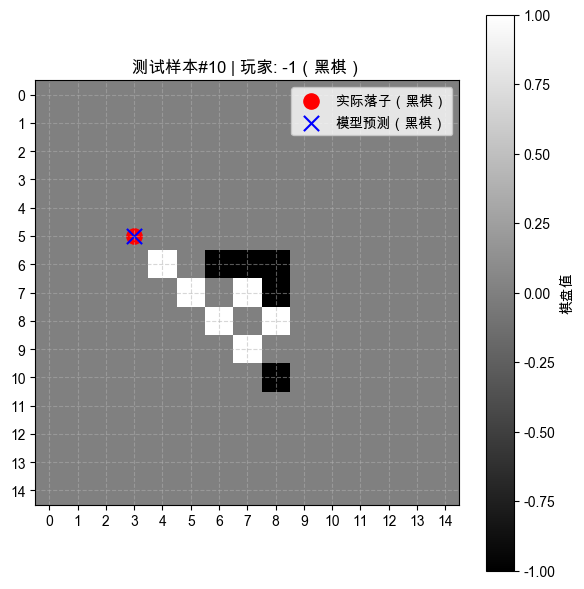

实际落子坐标: (row=5, col=3)，黑棋下棋
模型预测落子坐标: (row=5, col=3)，预测为黑棋下棋
预测正确！


In [16]:
# 选取一个测试样本进行可视化、解读、预测与对比
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'STHeiti', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 选某个测试样本
idx = 10
sample_X = test_X_np[idx]  # shape: (226,)
sample_y = test_y_np[idx]  # shape: (225,)

# 还原棋盘状态和玩家
player = int(sample_X[0])
board_flat = sample_X[1:]
board = board_flat.reshape(15, 15)

# 解读实际落子坐标（注意：one-hot编码使用 idx = x*15 + y）
actual_move_idx = sample_y.argmax()
actual_row, actual_col = divmod(actual_move_idx, 15)  # 还原为 (x, y)

# 用模型预测（推理阶段加mask）
model.eval()
with torch.no_grad():
    pred_logits = model(torch.tensor(sample_X, dtype=torch.float32).unsqueeze(0))  # shape: (1, 225)
    # mask非法落子
    mask = (board_flat == 0)  # 合法落子为0
    masked_logits = pred_logits.clone()
    masked_logits[0][~mask] = -1e9
    pred_move_idx = masked_logits.squeeze().argmax().item()
    pred_row, pred_col = divmod(pred_move_idx, 15)  # (y, x)

# 判断当前玩家颜色
player_label = '白棋' if player == 1 else '黑棋'

# 可视化棋盘+标注实际和预测落子，纵轴从下到上从小到大
plt.figure(figsize=(6,6))
plt.imshow(board, cmap='gray', interpolation='none', vmin=-1, vmax=1)
plt.title(f'测试样本#{idx} | 玩家: {player}（{player_label}）')
plt.colorbar(label='棋盘值')

# 标注实际落子与预测落子（imshow坐标系：横轴为列y，纵轴为行x）
plt.scatter(actual_col, actual_row, c='red', s=120, marker='o', label=f'实际落子（{player_label}）')
plt.scatter(pred_col, pred_row,  c='blue', s=120, marker='x', label=f'模型预测（{player_label}）')

plt.legend(loc='upper right')
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(0, 15))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f'实际落子坐标: (row={actual_row}, col={actual_col})，{player_label}下棋')
print(f'模型预测落子坐标: (row={pred_row}, col={pred_col})，预测为{player_label}下棋')
print('预测正确！' if (actual_col, actual_row) == (pred_col, pred_row) else '预测错误。')

# 8. Save Model

In [17]:
# 保存模型参数到文件
model_save_path = 'nn_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f'模型已保存到 {model_save_path}')

模型已保存到 nn_model.pth


# 9. Manual Test

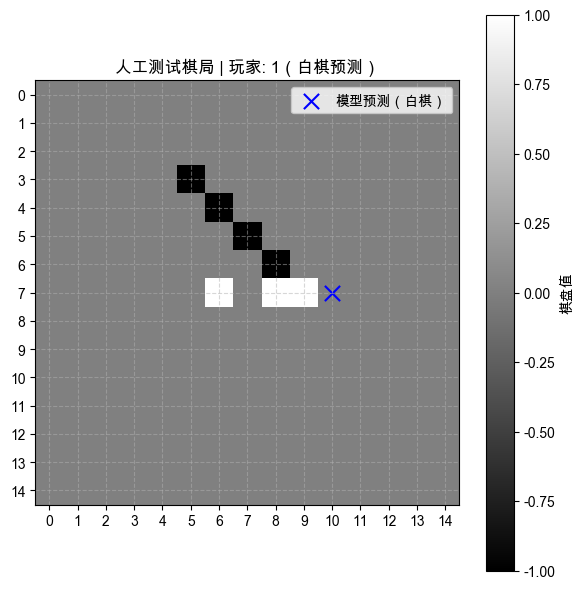

模型预测落子坐标: (row=7, col=10)，为白棋下棋进行预测


In [18]:
# 用指定棋局和玩家进行模型预测和可视化
import matplotlib.pyplot as plt
import numpy as np

player = 1
board = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# 构造输入特征
sample_X = np.concatenate([[player], board.flatten()])

# 用模型预测（模型内部会基于原始输入自动mask非法落子）
model.eval()
with torch.no_grad():
    pred_logits = model(torch.tensor(sample_X, dtype=torch.float32).unsqueeze(0))  # shape: (1, 225)
    pred_move_idx = pred_logits.squeeze().argmax().item()
    pred_row, pred_col = divmod(pred_move_idx, 15)  # (y, x)

# 判断当前玩家颜色
player_label = '白棋' if player == 1 else '黑棋'

# 可视化棋盘+标注预测落子
plt.figure(figsize=(6,6))
plt.imshow(board, cmap='gray', interpolation='none', vmin=-1, vmax=1)
plt.title(f'人工测试棋局 | 玩家: {player}（{player_label}预测）')
plt.colorbar(label='棋盘值')
plt.scatter(pred_col, pred_row, c='blue', s=120, marker='x', label=f'模型预测（{player_label}）')
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(0, 15))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f'模型预测落子坐标: (row={pred_row}, col={pred_col})，为{player_label}下棋进行预测')

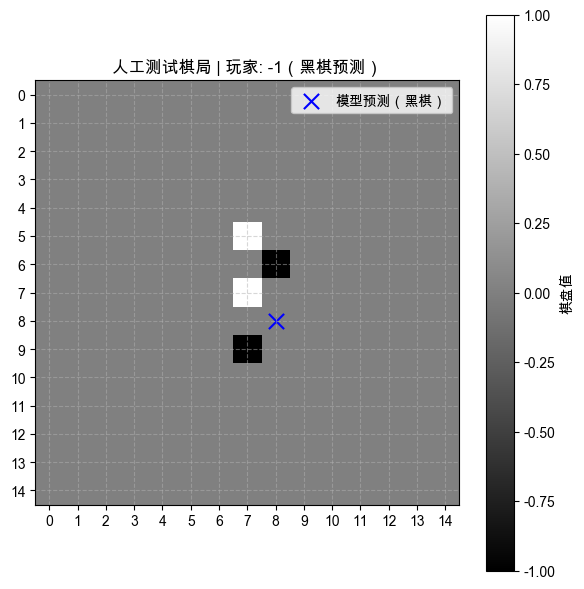

模型预测落子坐标: (row=8, col=8)，为黑棋下棋进行预测


In [19]:
# 用指定棋局和玩家进行模型预测和可视化
import matplotlib.pyplot as plt
import numpy as np

player = -1
board = np.array(
     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
)

# 构造输入特征
sample_X = np.concatenate([[player], board.flatten()])

# 用模型预测（模型内部会基于原始输入自动mask非法落子）
model.eval()
with torch.no_grad():
    pred_logits = model(torch.tensor(sample_X, dtype=torch.float32).unsqueeze(0))  # shape: (1, 225)
    pred_move_idx = pred_logits.squeeze().argmax().item()
    pred_row, pred_col = divmod(pred_move_idx, 15)  # (y, x)

# 判断当前玩家颜色
player_label = '白棋' if player == 1 else '黑棋'

# 可视化棋盘+标注预测落子
plt.figure(figsize=(6,6))
plt.imshow(board, cmap='gray', interpolation='none', vmin=-1, vmax=1)
plt.title(f'人工测试棋局 | 玩家: {player}（{player_label}预测）')
plt.colorbar(label='棋盘值')
plt.scatter(pred_col, pred_row, c='blue', s=120, marker='x', label=f'模型预测（{player_label}）')
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 15))
plt.yticks(np.arange(0, 15))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f'模型预测落子坐标: (row={pred_row}, col={pred_col})，为{player_label}下棋进行预测')